In [54]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
print(os.listdir("../input"))

['train.csv', 'test.csv']


In [55]:
df = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [57]:
print(df.Activity.unique())
print("----------------------------------------")
print(df.Activity.value_counts())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
----------------------------------------
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64


In [60]:
print(df.shape , test.shape)

(7352, 563) (2947, 563)


In [61]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [69]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df.iloc[:,0:562])
mat_train = scaler.transform(df.iloc[:,0:562])
print(mat_train)

[[0.64429225 0.48985291 0.43354743 ... 0.79825103 0.47068654 0.        ]
 [0.63920942 0.49179472 0.4382399  ... 0.79848665 0.47284164 0.        ]
 [0.63982653 0.49026642 0.44326915 ... 0.79872236 0.47544109 0.        ]
 ...
 [0.63669369 0.49149469 0.47748909 ... 0.84506893 0.52040559 1.        ]
 [0.64482708 0.49057848 0.42085971 ... 0.84323381 0.51266974 1.        ]
 [0.67575173 0.49378844 0.39806642 ... 0.84348837 0.51834742 1.        ]]


In [70]:
scaler = MinMaxScaler()
scaler.fit(test.iloc[:,0:562])
mat_test = scaler.transform(test.iloc[:,0:562])
print(mat_test)

[[0.6718788  0.55764282 0.52464834 ... 0.62209457 0.46362736 0.        ]
 [0.69470427 0.57426358 0.42707858 ... 0.62446791 0.45014396 0.        ]
 [0.68636345 0.55310221 0.42794829 ... 0.62380956 0.45251181 0.        ]
 ...
 [0.74529355 0.64526771 0.43015674 ... 0.62088108 0.58803909 1.        ]
 [0.65638384 0.62620241 0.44817885 ... 0.61581385 0.59135763 1.        ]
 [0.58994885 0.56560474 0.41032069 ... 0.61537208 0.59163879 1.        ]]


In [71]:
temp = []
for i in df.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
df["n_Activity"] = temp

In [75]:
temp = []
for i in test.Activity:
    if i == "WALKING": temp.append(0)
    if i == "WALKING_UPSTAIRS": temp.append(1)
    if i == "WALKING_DOWNSTAIRS": temp.append(2)
    if i == "SITTING": temp.append(3)
    if i == "STANDING": temp.append(4)
    if i == "LAYING": temp.append(5)
test["n_Activity"] = temp

In [72]:
df.drop(["Activity"] , axis = 1 , inplace = True)

In [77]:
test.drop(["Activity"] , axis = 1 , inplace = True)

In [82]:
from keras.utils import to_categorical
y_train = to_categorical(df.n_Activity , num_classes=6)
y_test = to_categorical(test.n_Activity , num_classes=6)

In [85]:
X_train = mat_train 
X_test = mat_test

In [87]:
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)

(7352, 562) (7352, 6)
(2947, 562) (2947, 6)


In [88]:
filepath="HAR_weights.hdf5"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint

lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

/opt/conda/lib/python3.6/site-packages/Keras-2.1.5-py3.6.egg/keras/callbacks.py:919: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.


In [89]:
from keras.models import Sequential
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

In [194]:
model = Sequential()

model.add(Dense(64, input_dim=X_train.shape[1] , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005),loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 64)                36032     
_________________________________________________________________
dense_110 (Dense)            (None, 64)                4160      
_________________________________________________________________
batch_normalization_9 (Batch (None, 64)                256       
_________________________________________________________________
dense_111 (Dense)            (None, 128)               8320      
_________________________________________________________________
dense_112 (Dense)            (None, 196)               25284     
_________________________________________________________________
dense_113 (Dense)            (None, 32)                6304      
_________________________________________________________________
dense_114 (Dense)            (None, 6)                 198       
Total para

In [195]:
history = model.fit(X_train, y_train , epochs=22 , batch_size = 256 , validation_data=(X_test, y_test) , callbacks=[checkpoint,lr_reduce])

Train on 7352 samples, validate on 2947 samples
Epoch 1/22
7352/7352 [==============================] - 2s 320us/step - loss: 0.4648 - acc: 0.7908 - val_loss: 0.2946 - val_acc: 0.8644

Epoch 00001: val_acc did not improve
Epoch 2/22
7352/7352 [==============================] - 0s 49us/step - loss: 0.1966 - acc: 0.9244 - val_loss: 0.1478 - val_acc: 0.9395

Epoch 00002: val_acc did not improve
Epoch 3/22
7352/7352 [==============================] - 0s 53us/step - loss: 0.0918 - acc: 0.9712 - val_loss: 0.0947 - val_acc: 0.9609

Epoch 00003: val_acc did not improve
Epoch 4/22
7352/7352 [==============================] - 0s 53us/step - loss: 0.0502 - acc: 0.9830 - val_loss: 0.1141 - val_acc: 0.9526

Epoch 00004: val_acc did not improve

Epoch 00004: ReduceLROnPlateau reducing learning rate to 5.0000002374872565e-05.
Epoch 5/22
7352/7352 [==============================] - 0s 46us/step - loss: 0.0370 - acc: 0.9878 - val_loss: 0.0652 - val_acc: 0.9742

Epoch 00005: val_acc improved from 0.9668

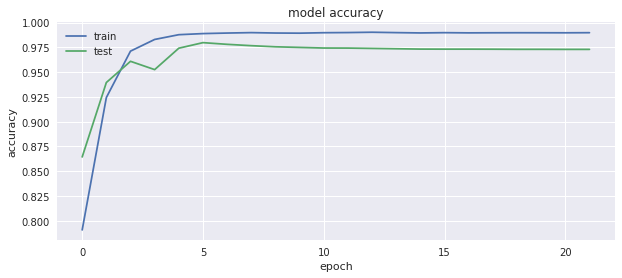

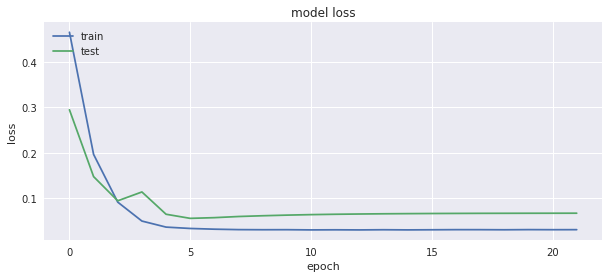

In [196]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [199]:
from sklearn.metrics import classification_report , accuracy_score
print(classification_report(y_true, pred))

             precision    recall  f1-score   support

          0       0.99      0.91      0.95       496
          1       0.98      0.89      0.93       471
          2       0.82      0.99      0.90       420
          3       0.94      0.90      0.92       491
          4       0.94      0.95      0.94       532
          5       0.98      1.00      0.99       537

avg / total       0.95      0.94      0.94      2947

